In [17]:
import pandas as pd
df = pd.read_csv('scraping.csv')

In [18]:
def clean(a,b):
    df['text']= df['text'].str.replace(a,b)
df['text'] = df['text'].astype(str).str.lower()
df.text = df.text.str.replace('\d+', '')
clean('.','')
clean(',','')
clean('-','')
clean('/','')
clean(':','')
df

C:\Users\jhonm\AppData\Local\Temp\ipykernel_62716\75004709.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df.text = df.text.str.replace('\d+', '')
C:\Users\jhonm\AppData\Local\Temp\ipykernel_62716\75004709.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['text']= df['text'].str.replace(a,b)


,Unnamed: 0,text
0,0,timestamp \n opening\n disclaimer \n iklan kop...
1,1,team speaker eggel sudah punya yang eggel fit ...
2,2,wah kebetulan lagi nyari speaker bluetooth yan...
3,3,masih qcy box tetap di hati gua punya speaker...
4,4,this is where local industries start rising pr...
...,...,...
1419,1419,nah
1420,1420,tod bacod
1421,1421,sori gw dislike textnya mengganggu gambar
1422,1422,rinrei


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(df['text'].values.astype('U'))  ## Even astype(str) would work
x = x.toarray()

In [31]:
from scipy.cluster.hierarchy import ward, dendrogram, fcluster, single, complete
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
%matplotlib inline

model = AgglomerativeClustering(distance_threshold=2, n_clusters=None ,compute_full_tree='full' ).fit(x)
labels= model.labels_
new_df=pd.DataFrame(list(zip(df['text'],labels)),columns=['title','cluster'])



print(new_df.sort_values(by=['cluster']))
new_df.to_csv('hierarchial.csv')


                                                  title  cluster
1423                                                           0
1293  wkwkwkwkkimisoo spiker rompall bangngakakk abi...        0
941   tambah terus durasinya bang  jangan remehin ho...        0
537   ko gak masuk bang speaker eggel nyapdahal itu ...        0
177   beberapa hari sempet bingung cari review sana ...        0
...                                                 ...      ...
1172                      eh eh \nyang kalian cari wkwk       60
1358                     ini yang kalian cari\n\neh ehh       60
1241                                       yang di cari       60
1244                        tuh yang di cari di tik tok       60
1235                                     yg kalian cari       60

[1424 rows x 2 columns]


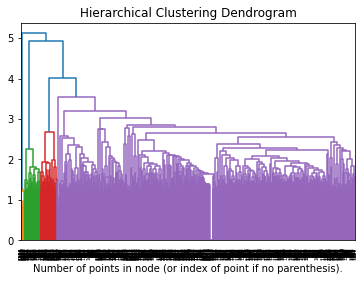

In [21]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=100)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()